In [4]:
# Övning 1a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame
import pandas as pd

file = '../../Data/Databehandling/student-mat-missing-data.csv'
df = pd.read_csv(file)

df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


In [5]:
# b) Do some initial explorations with the methods to get an understanding of the dataset:
# head(), info(), describe(), value_counts(), unique(), columns()

print(df.head())
print(df.info())
print(df.describe())
print(df.value_counts())
print(df.nunique())
print(df.columns)

   Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F  18.0       U     GT3       A     4     4  at_home   
1           1     GP   F  17.0       U     GT3       T     1     1  at_home   
2           2     GP   F  15.0       U     LE3       T     1     1  at_home   
3           3     GP   F  15.0       U     GT3       T     4     2   health   
4           4     GP   F  16.0       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...    4.0      3.0   4.0     1     1     3.0      6.0   5   6   6  
1  ...    5.0      3.0   3.0     1     1     3.0      4.0   5   5   6  
2  ...    4.0      3.0   2.0     2     3     3.0     10.0   7   8  10  
3  ...    3.0      2.0   2.0     1     1     5.0      2.0  15  14  15  
4  ...    4.0      3.0   2.0     1     2     5.0      4.0   6  10  10  

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 39

c:\Programmering\IT_hogskolan\python-programming-JENNY-SKOGLUND\Excercises\Databehandling\data_utils.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette=colors)
c:\Programmering\IT_hogskolan\python-programming-JENNY-SKOGLUND\Excercises\Databehandling\data_utils.py:15: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x=missing_values.index, y=missing_values.values, palette=colors)


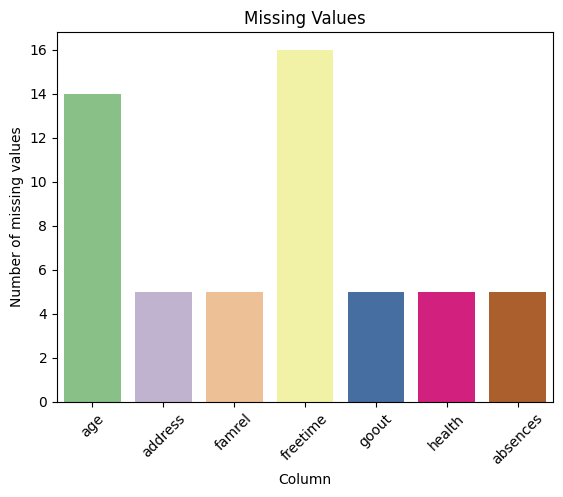

In [6]:
# c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. 
# Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

from data_utils import plot_missing_values

plot_missing_values(df)
